# Daily Report

We replicate the numbers of cases published in the daily meeting

In [1]:
import glob
import os
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib 



Using matplotlib backend: MacOSX


In [9]:

strpath = '../src/'
m = []
if not os.path.isfile('report_data1.csv'):
    for filename in glob.glob(strpath+"*"):
        date = filename[7:9] +'-' + filename[11:13] +'-' +filename[13:15]
        df = pd.read_csv(filename, encoding = "ISO-8859-1",dtype =str)
        df['FECHA_ACTUALIZACION1'] = pd.to_datetime(df['FECHA_ACTUALIZACION'],)
        df.FECHA_INGRESO = pd.to_datetime(df['FECHA_INGRESO'],)
        df.FECHA_SINTOMAS = pd.to_datetime(df['FECHA_SINTOMAS'],)
        df['deltaSintomas']=df.FECHA_ACTUALIZACION1-df.FECHA_SINTOMAS 
        df['deltaSintomas'] = df.deltaSintomas.dt.days
        df.loc[df.FECHA_DEF=='9999-99-99', 'FECHA_DEF'] = '2050-12-31'
        df.FECHA_DEF = pd.to_datetime(df['FECHA_DEF'],)
        m.append([df.FECHA_ACTUALIZACION.unique()[0]
                  ,df[(df.deltaSintomas<14)& (df.RESULTADO=='1')]['ID_REGISTRO'].count()
              ,df[df.RESULTADO=='1']['ID_REGISTRO'].count()
              ,df[(df.FECHA_DEF!='2050-12-31')&(df.RESULTADO=='1')]['ID_REGISTRO'].count()
              ,df[df.RESULTADO=='3']['ID_REGISTRO'].count()
              ,df.ID_REGISTRO.nunique()
              ,len(df[(df.deltaSintomas<14)& (df.RESULTADO=='3')])
              ,len(df[(df.FECHA_DEF<'2020-12-31')&(df.RESULTADO=='3')])
              ,len(df[(df.FECHA_DEF<'2020-12-31')&(df.RESULTADO=='2')])
                 ]
        )
    df = pd.DataFrame(m)
    df.columns = ['date', 'activos', 'positivos', 'muertes', 'sospechosos', 'muestra', 'activos sospechosos', 'defunciones sospechosos', 'muertos negativos']
    df = df.sort_values(by='date', ascending=False)
    df = df.reset_index(drop=True)
    df.to_csv('report_data.csv', index=False)
else:
    df = pd.read_csv('report_data.csv')
    

In [10]:
column = df.columns[1:]
for each in column:
    column_name = '∆ '+ each
    df[column_name] = df[each] - df[each].shift(-1)
    column_name1 = '% '+ each
    df[column_name1] = (df[column_name]/ df[column_name].shift(-1))*100

In [11]:
df.date = pd.to_datetime(df['date'], format='%Y-%m-%d')

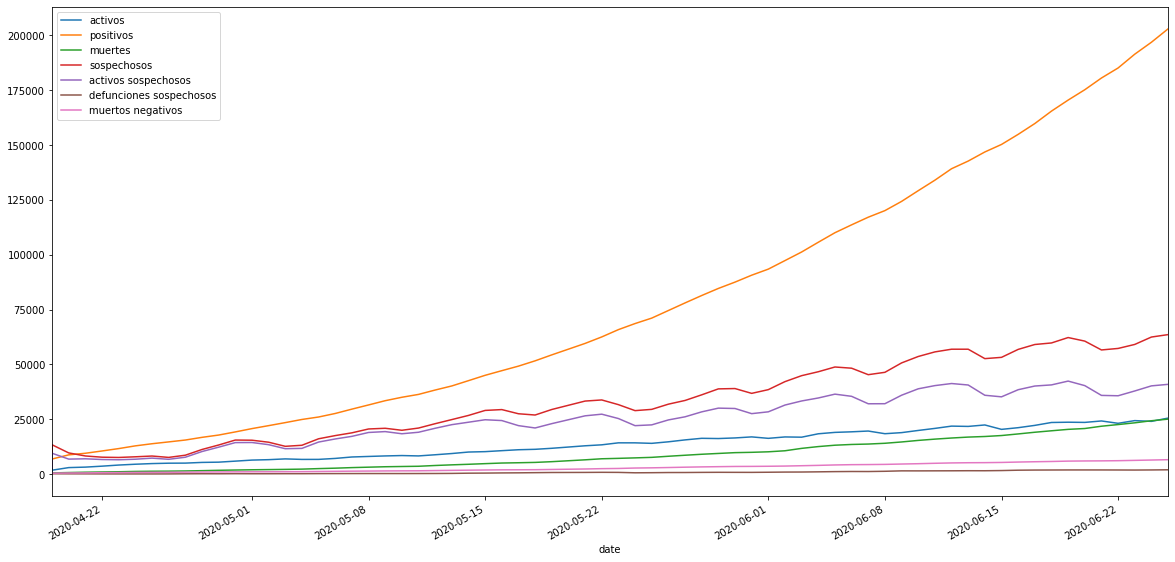

In [12]:
df[['date', 'activos', 'positivos', 'muertes', 'sospechosos',
       'activos sospechosos', 'defunciones sospechosos', 'muertos negativos',]].set_index('date').plot(figsize=(20,10))

In [13]:
df

,date,activos,positivos,muertes,sospechosos,muestra,activos sospechosos,defunciones sospechosos,muertos negativos,∆ activos,...,∆ sospechosos,% sospechosos,∆ muestra,% muestra,∆ activos sospechosos,% activos sospechosos,∆ defunciones sospechosos,% defunciones sospechosos,∆ muertos negativos,% muertos negativos
0,2020-06-25,25529,202951,25060,63583,528651,40914,1966,6570,1493.0,...,1108.0,32.888097,12993.0,94.240952,695.0,29.892473,72.0,156.521739,158.0,103.947368
1,2020-06-24,24036,196847,24324,62475,515658,40219,1894,6412,-351.0,...,3369.0,184.602740,13787.0,103.498236,2325.0,106.456044,46.0,-176.923077,152.0,102.013423
2,2020-06-23,24387,191410,23377,59106,501871,37894,1848,6260,1232.0,...,1825.0,264.109986,13321.0,147.650188,2184.0,-1323.636364,-26.0,144.444444,149.0,196.052632
3,2020-06-22,23155,185122,22584,57281,488550,35710,1874,6111,-1070.0,...,691.0,-17.142148,9022.0,161.800574,-165.0,3.701211,-18.0,600.000000,76.0,168.888889
4,2020-06-21,24225,180545,21825,56590,479528,35875,1892,6035,658.0,...,-4031.0,248.214286,5576.0,68.967223,-4458.0,215.883777,-3.0,-75.000000,45.0,65.217391
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,2020-04-19,1777,6875,546,13364,48365,9504,153,434,1150.0,...,2572.0,-163.094483,6772.0,-89.411143,3840.0,-112.510987,63.0,-190.909091,75.0,-63.025210
70,2020-04-19,627,5399,406,10792,41593,5664,90,359,-1646.0,...,-1577.0,-241.871166,-7574.0,-160.093004,-3413.0,-156.703398,-33.0,-106.451613,-119.0,-145.121951
71,2020-04-19,2273,7497,650,12369,49167,9077,123,478,1355.0,...,652.0,-104.654896,4731.0,-169.024652,2178.0,-205.471698,31.0,-344.444444,82.0,-282.758621
72,2020-04-19,918,5847,449,11717,44436,6899,92,396,-365.0,...,-623.0,NaN,-2799.0,NaN,-1060.0,NaN,-9.0,NaN,-29.0,NaN


In [14]:
print("Activos %i. ∆ %i. %% %.2f"%(df.loc[0]['activos'], df.loc[0]['∆ activos'],df.loc[0]['% activos'],) )
print("Positivos %i. ∆ %i. %% %.2f"%(df.loc[0]['positivos'], df.loc[0]['∆ positivos'],df.loc[0]['% positivos'],) )
print("Muertes %i. ∆ %i. %% %.2f"%(df.loc[0]['muertes'], df.loc[0]['∆ muertes'],df.loc[0]['% muertes'],) )
print("Sospechosos %i. ∆ %i. %% %.2f"%(df.loc[0]['sospechosos'], df.loc[0]['∆ sospechosos'],df.loc[0]['% sospechosos'],) )
print("---Sospechosos---")
print("Activos %i. ∆ %i. %% %.2f"%(df.loc[0]['activos sospechosos'], df.loc[0]['∆ activos sospechosos'],df.loc[0]['% activos sospechosos'],) )
print("Defunciones %i. ∆ %i. %% %.2f"%(df.loc[0]['defunciones sospechosos'], df.loc[0]['∆ defunciones sospechosos'],df.loc[0]['% defunciones sospechosos'],) )
print("\nDefunciones de personas que dieron negativo a la prueba de laboratorio\nTotal %i. ∆ %i. %% %.2f"%(df.loc[0]['muertos negativos'], df.loc[0]['∆ muertos negativos'],df.loc[0]['% muertos negativos'],) )


Activos 25529. ∆ 1493. % -425.36
Positivos 202951. ∆ 6104. % 112.27
Muertes 25060. ∆ 736. % 77.72
Sospechosos 63583. ∆ 1108. % 32.89
---Sospechosos---
Activos 40914. ∆ 695. % 29.89
Defunciones 1966. ∆ 72. % 156.52

Defunciones de personas que dieron negativo a la prueba de laboratorio
Total 6570. ∆ 158. % 103.95


In [8]:
print("Activos %i. ∆ %i. %% %.2f"%(df.loc[0]['activos'], df.loc[0]['∆ activos'],df.loc[0]['% activos'],) )
print("Positivos %i. ∆ %i. %% %.2f"%(df.loc[0]['positivos'], df.loc[0]['∆ positivos'],df.loc[0]['% positivos'],) )
print("Muertes %i. ∆ %i. %% %.2f"%(df.loc[0]['muertes'], df.loc[0]['∆ muertes'],df.loc[0]['% muertes'],) )
print("Sospechosos %i. ∆ %i. %% %.2f"%(df.loc[0]['sospechosos'], df.loc[0]['∆ sospechosos'],df.loc[0]['% sospechosos'],) )
print("---Sospechosos---")
print("Activos %i. ∆ %i. %% %.2f"%(df.loc[0]['activos sospechosos'], df.loc[0]['∆ activos sospechosos'],df.loc[0]['% activos sospechosos'],) )
print("Defunciones %i. ∆ %i. %% %.2f"%(df.loc[0]['defunciones sospechosos'], df.loc[0]['∆ defunciones sospechosos'],df.loc[0]['% defunciones sospechosos'],) )
print("\nDefunciones de personas que dieron negativo a la prueba de laboratorio\nTotal %i. ∆ %i. %% %.2f"%(df.loc[0]['muertos negativos'], df.loc[0]['∆ muertos negativos'],df.loc[0]['% muertos negativos'],) )


Activos 24036. ∆ -351. % -28.49
Positivos 196847. ∆ 5437. % 86.47
Muertes 24324. ∆ 947. % 119.42
Sospechosos 62475. ∆ 3369. % 184.60
---Sospechosos---
Activos 40219. ∆ 2325. % 106.46
Defunciones 1894. ∆ 46. % -176.92

Defunciones de personas que dieron negativo a la prueba de laboratorio
Total 6412. ∆ 152. % 102.01


In [ ]:
recuperados 116862